In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [4]:
x = df.drop(['diagnosis'],axis='columns')
y = df['diagnosis']

In [5]:
x.shape

(569, 5)

In [6]:
y.shape

(569,)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [9]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(455, 5)
(114, 5)
(455,)
(114,)


In [10]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [11]:
model.fit(x_train,y_train)

/home/akira/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [12]:
model.score(x_test,y_test)

0.9385964912280702

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

def find_best_model_using_gridsearchcv(X,y):
    algos = {
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
            }
        },
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'random_state': [1,5,10],
                'criterion': ['gini','entropy']
            }
        },
        'svm': {
            'model': SVC(gamma='auto'),
            'params' : {
                'C': [1,10,20],
                'kernel': ['rbf','linear']
            }  
        },
        'random_forest': {
            'model': RandomForestClassifier(),
            'params' : {
                'n_estimators': [1,5,10]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

In [61]:
find_best_model_using_gridsearchcv(x,y)


/home/akira/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/akira/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

,model,best_score,best_params
0,logistic_regression,0.901754,{}
1,decision_tree,0.908772,"{'criterion': 'entropy', 'random_state': 5}"
2,svm,0.919298,"{'C': 10, 'kernel': 'linear'}"
3,random_forest,0.917544,{'n_estimators': 10}


In [24]:
random_forest_model = RandomForestClassifier(n_estimators=10)
random_forest_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10)

In [62]:
svc_model = SVC(C=10,kernel='linear')
svc_model.fit(x,y)

SVC(C=10, kernel='linear')

In [64]:
svc_model.score(x_test,y_test)

0.8771929824561403

In [65]:
model.fit(x,y)
model.score(x_test,y_test)


0.868421052631579

In [70]:
random_forest_model.fit(x,y)
random_forest_model.score(x_train,y_train)

0.9934065934065934

Text(95.72222222222221, 0.5, 'Truth')

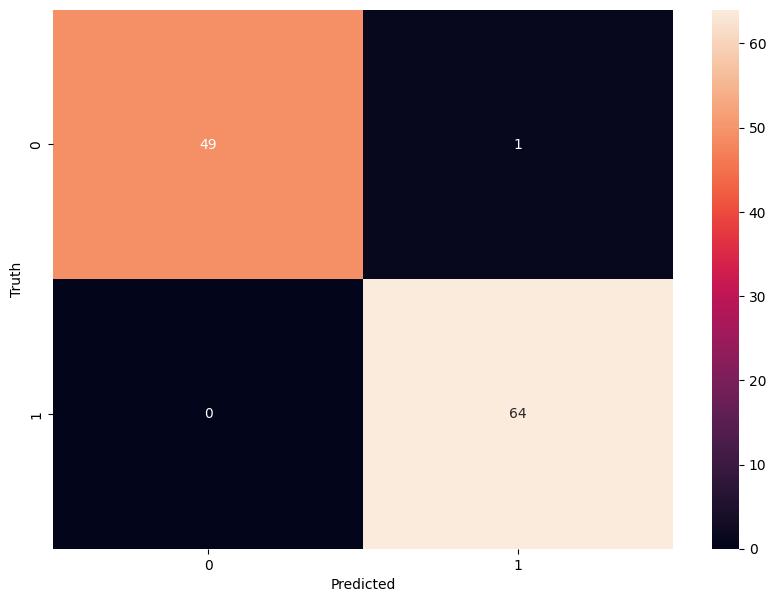

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
from matplotlib import pyplot as plt

y_pred = random_forest_model.predict(x_test)

confu = confusion_matrix(y_test,y_pred)
plt.figure(figsize = (10,7))
sn.heatmap(confu, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Exporting the model

In [67]:
import pickle
with open('breast_cancer_prediction_model.pickle','wb') as file:
    pickle.dump(random_forest_model,file)

In [69]:
import json
columns = {
    'data_columns' : [col.lower() for col in x.columns]
}
with open ('columns.json','w') as json_file:
    json_file.write(json.dumps(columns))